<a href="https://colab.research.google.com/github/0hanka07/MyFirstRepo/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

**Objectives**: After completing this lab you will be able to:
*   Use scikit-learn to implement Multiple Linear Regression
*   Create a model, train it, test it and use the model

**Problem:** Predict carbon dioxide emissions for light-duty vehicles for sale in Canada.

**Step 1: Importing Needed packages**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

**Step 2: Data Collection**

To download the data, we will use !wget to download it from IBM Object Storage.

In [3]:
#!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

!wget -O FuelConsumption.csv https://open.canada.ca/data/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/2309538b-53d1-4635-a88e-e237bfcef7a2/download/my2005-2014-fuel-consumption-ratings-5-cycle.csv

--2024-06-20 09:10:20--  https://open.canada.ca/data/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/2309538b-53d1-4635-a88e-e237bfcef7a2/download/my2005-2014-fuel-consumption-ratings-5-cycle.csv
Resolving open.canada.ca (open.canada.ca)... 52.138.27.246
Connecting to open.canada.ca (open.canada.ca)|52.138.27.246|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://opencanada.blob.core.windows.net/opengovprod/resources/2309538b-53d1-4635-a88e-e237bfcef7a2/my2005-2014-fuel-consumption-ratings-5-cycle.csv?se=2024-06-20T10%3A10%3A20Z&sp=r&sv=2019-07-07&sr=b&sig=uc3nd0qVTavUzkFHnbyk3/87DUbSEwb8FwjqwlboDqQ%3D [following]
--2024-06-20 09:10:20--  https://opencanada.blob.core.windows.net/opengovprod/resources/2309538b-53d1-4635-a88e-e237bfcef7a2/my2005-2014-fuel-consumption-ratings-5-cycle.csv?se=2024-06-20T10%3A10%3A20Z&sp=r&sv=2019-07-07&sr=b&sig=uc3nd0qVTavUzkFHnbyk3/87DUbSEwb8FwjqwlboDqQ%3D
Resolving opencanada.blob.core.windows.net (opencanada.blob

**Step 3: Load dataset**

In [15]:
#size of the data set
df.shape


(10561, 15)

In [14]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head(10)
#preview last rows
#df.tail()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,NaN,NaN
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,NaN,NaN
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,21,315,NaN,NaN
3,2005,Acura,NSX,Two-seater,3.0,6,AS4,Z,15.1,10.5,13.0,22,299,NaN,NaN
4,2005,Acura,NSX,Two-seater,3.2,6,M6,Z,15.1,10.5,13.0,22,299,NaN,NaN
5,2005,Acura,RL,Mid-size,3.5,6,AS5,Z,14.5,9.9,12.4,23,285,NaN,NaN
6,2005,Acura,RSX,Subcompact,2.0,4,AS5,X,10.6,7.6,9.3,30,214,NaN,NaN
7,2005,Acura,RSX,Subcompact,2.0,4,M5,X,9.9,7.6,8.9,32,205,NaN,NaN
8,2005,Acura,RSX,Subcompact,2.0,4,M6,Z,11.8,8.3,10.2,28,235,NaN,NaN
9,2005,Acura,TL,Mid-size,3.2,6,AS5,Z,13.3,8.9,11.3,25,260,NaN,NaN


**Step 4: Understand data**

The dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

MODEL YEAR e.g. 2014

MAKE e.g. Acura

MODEL e.g. ILX

VEHICLE CLASS e.g. SUV

ENGINE SIZE e.g. 4.7

CYLINDERS e.g 6

TRANSMISSION e.g. A6

FUELTYPE e.g. z

FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9

FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9

FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2

CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

**Step 5: Data preprocessing**

Let's rename columns for an ease of use. Change only useful column for this problem and leave others.

In [16]:
df = df.rename(columns={'Engine size (L)': 'ENGINESIZE', 'City (L/100 km)': 'FUELCONSUMPTION_CITY', 'Highway (L/100 km)': 'FUELCONSUMPTION_HWY', 'Combined (L/100 km)': 'COMBINED','CO2 emissions (g/km)': 'CO2EMISSIONS'})
df.head()

,Model year,Make,Model,Vehicle class,ENGINESIZE,Cylinders,Transmission,Fuel type,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,COMBINED,Combined (mpg),CO2EMISSIONS,CO2 rating,Smog rating
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,NaN,NaN
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,NaN,NaN
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,21,315,NaN,NaN
3,2005,Acura,NSX,Two-seater,3.0,6,AS4,Z,15.1,10.5,13.0,22,299,NaN,NaN
4,2005,Acura,NSX,Two-seater,3.2,6,M6,Z,15.1,10.5,13.0,22,299,NaN,NaN


In [17]:
# Let's select some features that we want to use for regression.

cdf = df[['ENGINESIZE','Cylinders','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','COMBINED','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,Cylinders,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,COMBINED,CO2EMISSIONS
0,1.7,4,9.2,7.2,8.3,191
1,1.7,4,9.1,7.3,8.3,191
2,3.5,6,15.9,11.1,13.7,315
3,3.0,6,15.1,10.5,13.0,299
4,3.2,6,15.1,10.5,13.0,299
5,3.5,6,14.5,9.9,12.4,285
6,2.0,4,10.6,7.6,9.3,214
7,2.0,4,9.9,7.6,8.9,205
8,2.0,4,11.8,8.3,10.2,235


**Step 6: Exploratory data analysis (EDA)**

Let's plot Emission values with respect to Engine size.

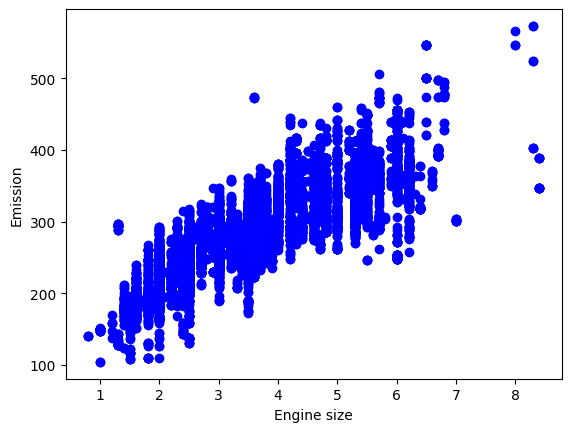

In [18]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

**Step 7: Data split (Train/Test Split)**

Let's split data into training and testing sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the **np.random.rand()** function:

In [19]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

This is our training data

In [24]:
train.shape

(8472, 6)

In [20]:
train.head()

,ENGINESIZE,Cylinders,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,COMBINED,CO2EMISSIONS
0,1.7,4,9.2,7.2,8.3,191
2,3.5,6,15.9,11.1,13.7,315
3,3.0,6,15.1,10.5,13.0,299
4,3.2,6,15.1,10.5,13.0,299
6,2.0,4,10.6,7.6,9.3,214


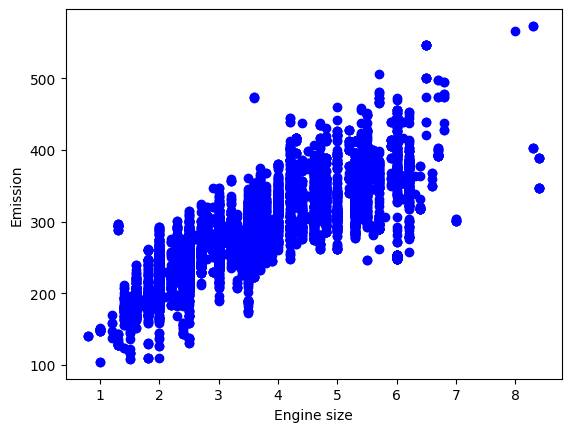

In [21]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

**Step 8.a: Model development (Training the model)**

Since, there are multiple variables that impact the CO2EMISSIONS, we would use multiple linear regression. We are predicting CO2EMISSIONS using the features COMBINED, ENGINESIZE and Cylinders of cars. Let's train our model on the training set.

In [27]:
from sklearn import linear_model
from sklearn.metrics import r2_score

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','Cylinders','COMBINED']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
#print ('Intercepts: ', regr.intercept__)
# Predict the target values on the training set
y_train_pred = regr.predict(x)

# Calculate R-squared on the training set
r2_training = r2_score(y, y_train_pred)

# Print the R-squared value
print("Training R-squared:", r2_training)

Coefficients:  [[ 7.56911417  6.79382031 11.80311133]]
Training R-squared: 0.8463850962979784


**Step 8.b: Model development (Testing the model)**

Let's test our model on the testing set.
Here, the variance score best possible score is 1.0, the lower values are worse.

In [28]:
y_test_pred = regr.predict(test[['ENGINESIZE','Cylinders','COMBINED']])
x = np.asanyarray(test[['ENGINESIZE','Cylinders','COMBINED']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_test_pred - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Testing R-squared: %.2f' % regr.score(x, y))
# you can also use r2_testing = r2_score(y, y_test_pred)

Residual sum of squares: 621.54
Testing R-squared: 0.86


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
